In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Source of the data: Startup Estonia (https://startupestonia.ee/startup-database)
df = pd.read_csv("estonian start-up turnover Q2 2023.csv", encoding = "utf-8")
df.shape

(1534, 7)

In [3]:
df.head()

,Startup,Sector,Business model,Employee count 2Q 2023,Employment taxes 2Q 2023,Turnover 2Q 2023,Year founded
0,Bolt,Transportation & Logistics,B2B2C,1290,€ 9M,€ 302.5M,2013
1,Wise,FinTech,"B2B, C2C, B2C",1899,€ 8.7M,€ 54.6K,2013
2,Veriff,CyberTech,"B2B, B2B2C",330,€ 2.4M,€ 18.1M,2015
3,Monese,FinTech,-,240,€ 1.6M,€ 74K,2015
4,Starship Technol...,Transportation & Logistics,-,166,€ 1.4M,€ 5.4M,2014


In [4]:
df.columns

Index(['Startup', 'Sector', 'Business model', 'Employee count 2Q 2023',
       'Employment taxes 2Q 2023', 'Turnover 2Q 2023', 'Year founded'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Startup                   1534 non-null   object
 1   Sector                    1534 non-null   object
 2   Business model            1534 non-null   object
 3   Employee count 2Q 2023    1534 non-null   object
 4   Employment taxes 2Q 2023  1534 non-null   object
 5   Turnover 2Q 2023          1534 non-null   object
 6   Year founded              1534 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 84.0+ KB


In [6]:
df.isnull().sum()

Startup                     0
Sector                      0
Business model              0
Employee count 2Q 2023      0
Employment taxes 2Q 2023    0
Turnover 2Q 2023            0
Year founded                0
dtype: int64

In [7]:
df.nunique()
# 1534 startups listed
# in 17 sectors
# with 34 combinations of business models

Startup                     1534
Sector                        17
Business model                34
Employee count 2Q 2023        67
Employment taxes 2Q 2023     420
Turnover 2Q 2023             610
Year founded                  12
dtype: int64

In [8]:
list(df["Sector"].unique())

['Transportation & Logistics',
 'FinTech',
 'CyberTech',
 'Communication',
 'Business software & HR',
 'Advanced Manufacturing & Industry',
 'Consumer products and services',
 'CleanTech',
 'SpaceTech',
 'TravelTech',
 'Gaming',
 'AgTech & FoodTech',
 'HealthTech, Life sciences & Wellness',
 'PropTech & Construction',
 'EdTech',
 'AdTech & Creative Tech',
 '-']

In [9]:
df["Sector"].value_counts()

Business software & HR                  268
FinTech                                 206
Consumer products and services          178
HealthTech, Life sciences & Wellness    137
AdTech & Creative Tech                  117
CleanTech                                85
Transportation & Logistics               84
Communication                            73
CyberTech                                69
Gaming                                   61
EdTech                                   58
Advanced Manufacturing & Industry        51
AgTech & FoodTech                        45
PropTech & Construction                  41
TravelTech                               40
SpaceTech                                20
-                                         1
Name: Sector, dtype: int64

In [10]:
# examining the one startup without a defined sector
df[df["Sector"]=="-"]

,Startup,Sector,Business model,Employee count 2Q 2023,Employment taxes 2Q 2023,Turnover 2Q 2023,Year founded
202,AYREN,-,"B2B, B2B2B, B2G, B2C, B2B2C",19,€ 30.8K,€ 508.2K,2023


In [11]:
# Search results indicated that this particular company works in the Transportation & Logisics industry (on the information technology subsector)
df.loc[202, "Sector"] = "Transportation & Logistics"
df.loc[202]

Startup                                           AYREN
Sector                       Transportation & Logistics
Business model              B2B, B2B2B, B2G, B2C, B2B2C
Employee count 2Q 2023                               19
Employment taxes 2Q 2023                        € 30.8K
Turnover 2Q 2023                               € 508.2K
Year founded                                       2023
Name: 202, dtype: object

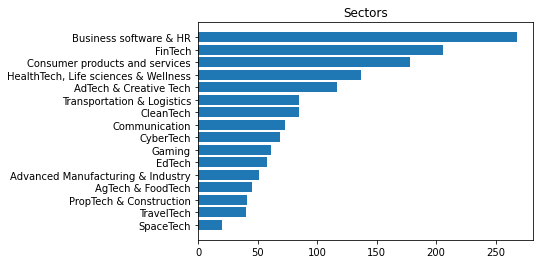

In [12]:
# Visualising the distribution of startups across different sectors
fig, ax = plt.subplots()
ax.set_title("Sectors")
ax.barh(df["Sector"].value_counts().index, df["Sector"].value_counts())
ax.invert_yaxis()
plt.show()

In [13]:
# Visualising the distribution of the number of employees and the year the startup was founded
df["Employee count 2Q 2023"].unique()

array(['1290', '1899', '330', '240', '166', '159', '192', '150', '114',
       '409', '104', '71', '130', '90', '38', '93', '70', '51', '43',
       '276', '97', '44', '57', '46', '34', '32', '48', '56', '60', '35',
       '47', '53', '30', '10', '42', '29', '27', '20', '41', '13', '28',
       '15', '39', '-', '21', '80', '18', '14', '25', '22', '17', '16',
       '9', '11', '12', '8', '23', '7', '4', '19', '6', '24', '2', '5',
       '3', '1', '156'], dtype=object)

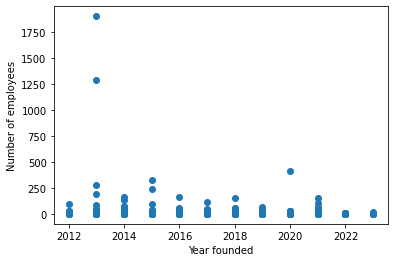

In [14]:
df_filter = df[df["Employee count 2Q 2023"] != "-"]
df_filter = pd.DataFrame(df_filter)
df_filter["Employee count 2Q 2023"] = df_filter["Employee count 2Q 2023"].astype('int64')


fig, ax = plt.subplots()
ax.set_xlabel("Year founded")
ax.set_ylabel("Number of employees")
ax.scatter(x=df_filter["Year founded"], y=df_filter["Employee count 2Q 2023"])


In [15]:
# Visualising the turnover

# Transformer the employee taxes and turnover columns to numerical values
df["Employment taxes 2Q 2023"] = df["Employment taxes 2Q 2023"].replace({"€ ":"", "M":"*1e6","K":"1e3","-":"0",",":"."}, regex = True)
df["Employment taxes 2Q 2023"] = df["Employment taxes 2Q 2023"].map(pd.eval).astype(int)

df["Turnover 2Q 2023"] = df["Turnover 2Q 2023"].replace({"€ ":"", "M":"*1e6","K":"1e3","-":"0",",":"."}, regex = True)
df["Turnover 2Q 2023"] = df["Turnover 2Q 2023"].map(pd.eval).astype(int)
df.head()

,Startup,Sector,Business model,Employee count 2Q 2023,Employment taxes 2Q 2023,Turnover 2Q 2023,Year founded
0,Bolt,Transportation & Logistics,B2B2C,1290,9000000,302500000,2013
1,Wise,FinTech,"B2B, C2C, B2C",1899,8700000,54610,2013
2,Veriff,CyberTech,"B2B, B2B2C",330,2400000,18100000,2015
3,Monese,FinTech,-,240,1600000,741000,2015
4,Starship Technol...,Transportation & Logistics,-,166,1400000,5400000,2014


In [16]:
df = df.sort_values("Turnover 2Q 2023", ascending = False)
df.head(100)

,Startup,Sector,Business model,Employee count 2Q 2023,Employment taxes 2Q 2023,Turnover 2Q 2023,Year founded
0,Bolt,Transportation & Logistics,B2B2C,1290,9000000,302500000,2013
2,Veriff,CyberTech,"B2B, B2B2C",330,2400000,18100000,2015
121,Viseven,Business software & HR,-,11,55910,8700000,2014
1289,Flant,Business software & HR,B2B,-,0,7761000,2018
315,Crezu,FinTech,B2C,2,9910,7700000,2018
...,...,...,...,...,...,...,...
124,Haut.AI,"HealthTech, Life sciences & Wellness",B2B,6,53610,805910,2018
176,REBELROAM OÜ,CyberTech,"B2B, B2B2C",8,36910,802310,2015
264,Quantfall,CyberTech,B2B,3,16310,791000,2021
44,CyberCube Analyt...,CyberTech,B2B,20,1751000,783410,2019


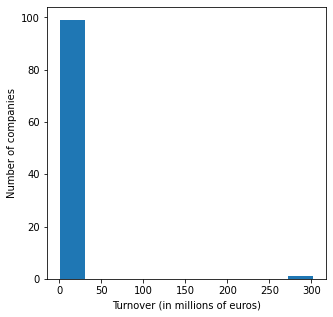

In [17]:
df_top_100 = df.iloc[0:100]
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(df_top_100["Turnover 2Q 2023"]/1e6)
ax.set_xlabel("Turnover (in millions of euros)")
ax.set_ylabel("Number of companies")
plt.show()
# One company (Bolt) had a turnover of more than 300 million euros on the second quarter of 2023

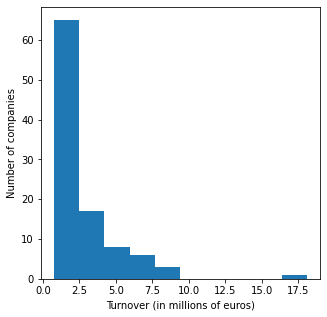

In [18]:
# Visualising the turnover of the next 100 companies (after Bolt)
df_top_100_without_bolt = df.iloc[1:101]
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(df_top_100_without_bolt["Turnover 2Q 2023"]/1e6)
ax.set_xlabel("Turnover (in millions of euros)")
ax.set_ylabel("Number of companies")
plt.show()